In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zubairsamo","key":"b8bd24f4cb677fdea691a70b50df5583"}'}

In [5]:
mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:44<00:00, 46.6MB/s]
100% 2.29G/2.29G [00:44<00:00, 54.9MB/s]


In [9]:
! mkdir Data

In [10]:
! unzip /content/chest-xray-pneumonia.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: Data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: Data/chest_xray/train/NORMAL/IM-0447-0001.jpeg  

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
Normal_img=cv2.imread("/content/Data/chest_xray/chest_xray/train/NORMAL/IM-0131-0001.jpeg")

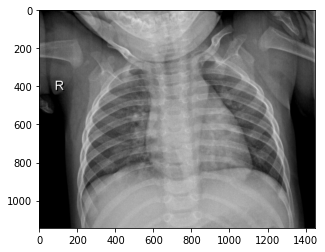

In [13]:
plt.imshow(Normal_img)

In [14]:
Normal_img.shape

(1144, 1450, 3)

In [15]:
Normal_img=cv2.cvtColor(Normal_img,cv2.COLOR_BGR2RGB)

In [16]:
Pneu_img=cv2.imread('/content/Data/chest_xray/chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg')

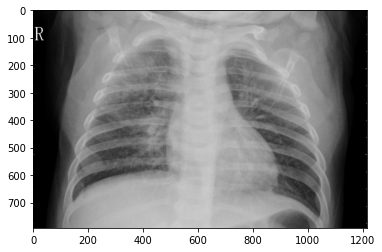

In [17]:
plt.imshow(Pneu_img)

In [18]:
Pneu_img.shape

(792, 1216, 3)

In [19]:
Pneu_img=cv2.cvtColor(Pneu_img,cv2.COLOR_BGR2RGB)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
Gen_img= ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Done


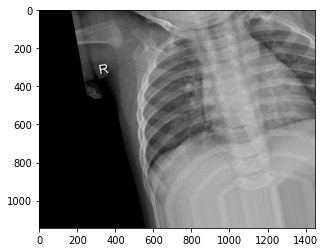

In [22]:
plt.imshow(Gen_img.random_transform(Normal_img))
print('Done')

In [23]:
Gen_img.flow_from_directory("/content/Data/chest_xray/chest_xray/train")

Found 5216 images belonging to 2 classes.


In [24]:
Gen_img.flow_from_directory("/content/Data/chest_xray/chest_xray/test")

Found 624 images belonging to 2 classes.


In [25]:
Gen_img.flow_from_directory("/content/Data/chest_xray/chest_xray/val")

Found 16 images belonging to 2 classes.


In [26]:
input_shape=(500,500,3)

In [27]:
from tensorflow.keras import Sequential

In [28]:
from tensorflow.keras.layers import Conv2D,Dense,Activation,Dropout,MaxPooling2D,Flatten

In [29]:
model=Sequential()

In [30]:
# conv Block 1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv Block 2
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv Block 3
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv Block 4
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense for Connection
model.add(Dense(256))
model.add(Activation('relu'))

# DropOut Layer for avoiding overfitting

model.add(Dropout(0.5))
# Dense Layer for output
model.add(Dense(1))
# Activation for Output
model.add(Activation('sigmoid'))

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 128)       7

In [33]:
input_shape[:2]

(500, 500)

In [34]:
batch_size=32
train_gen=Gen_img.flow_from_directory('/content/Data/chest_xray/chest_xray/train',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [35]:
test_gen=Gen_img.flow_from_directory('/content/Data/chest_xray/chest_xray/test',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 624 images belonging to 2 classes.


In [36]:
val_gen=Gen_img.flow_from_directory('/content/Data/chest_xray/chest_xray/val',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 16 images belonging to 2 classes.


In [37]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [38]:
results=model.fit_generator(train_gen,epochs=10,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 216s 2s/step - loss: 0.4786 - accuracy: 0.7594 - val_loss: 0.5515 - val_accuracy: 0.7370
Epoch 2/10
100/100 [==============================] - 208s 2s/step - loss: 0.3575 - accuracy: 0.8216 - val_loss: 0.7691 - val_accuracy: 0.6615
Epoch 3/10
100/100 [==============================] - 204s 2s/step - loss: 0.3463 - accuracy: 0.8378 - val_loss: 0.5455 - val_accuracy: 0.7839
Epoch 4/10
100/100 [==============================] - 203s 2s/step - loss: 0.3269 - accuracy: 0.8547 - val_loss: 0.5050 - val_accuracy: 0.6901
Epoch 5/10
100/100 [==============================] - 200s 2s/step - loss: 0.3183 - accuracy: 0.8622 - val_loss: 0.4535 - val_accuracy: 0.8151
Epoch 6/10
100/100 [==============================] - 199s 2s/step - loss: 0.2802 - accuracy: 0.8778 - val_loss: 0.4785 - val_accuracy: 0.8047
Epoch 7/10
100/100 [==============================] - 199s 2s/step

In [39]:
type(results)

tensorflow.python.keras.callbacks.History

In [40]:
print(results.history['accuracy'])

[0.7593749761581421, 0.8215625286102295, 0.8378124833106995, 0.854687511920929, 0.8621875047683716, 0.8778125047683716, 0.8799999952316284, 0.885937511920929, 0.890625, 0.8853124976158142]


In [41]:
print(results.history['loss'])

[0.4786331057548523, 0.35749927163124084, 0.3463094234466553, 0.32689982652664185, 0.31830471754074097, 0.28022170066833496, 0.2875508964061737, 0.2685355246067047, 0.2594965100288391, 0.269626259803772]


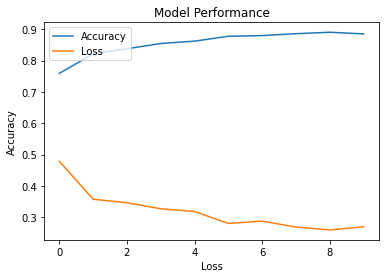

In [42]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy','Loss'],loc=('upper left'))
plt.show()

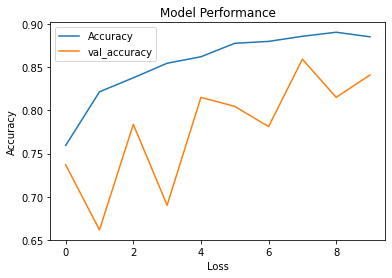

In [43]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy','val_accuracy'],loc=('upper left'))
plt.show()

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [54]:
Normal=image.load_img('/content/Data/chest_xray/train/PNEUMONIA/person1273_bacteria_3233.jpeg',target_size=(500,500,3))
Normal=image.img_to_array(Normal)
print(Normal.shape)
Normal=np.expand_dims(Normal,axis=0)
print(Normal.shape)
Normal=Normal/255

(500, 500, 3)
(1, 500, 500, 3)


In [55]:
prediction=model.predict(Normal)

In [56]:
print(f'chances of Normal according to model is:{prediction}')

chances of Normal according to model is:[[0.9017159]]


In [57]:
result=model.predict_classes(Normal)
print(result)
if result[0][0]==1:
  prediction='Pneumonia'
else:
  prediction='Normal'

print(prediction)

[[1]]
Pneumonia


In [53]:
model.save_weights('Chest_Xray_Classifier.h5')